In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Implementación y visualización de k-means en 2D (30 ptos)

**Cargar la base de datos kmeans1.csv utilizando pandas.**
(5 puntos)

In [72]:
df = pd.read_csv("kmeans1.csv")
df.head()

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209


**Por medio de matplotlib (o seaborn) genere un gr ́afico de dispersi ́on (scatter plot) de las variables A y B.** (5 puntos)

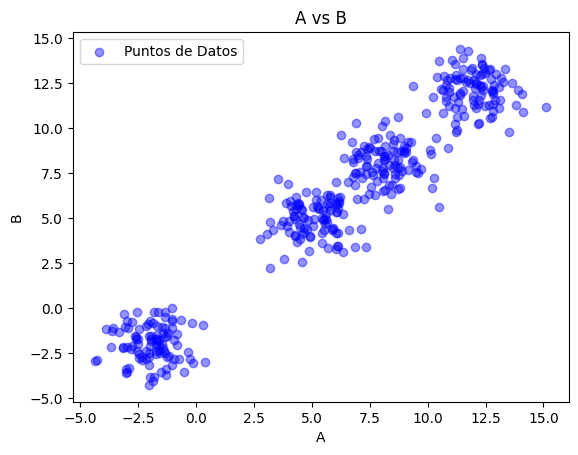

In [73]:
plt.scatter(df["A"], df["B"], color="blue", alpha=0.43, label="Puntos de Datos")

plt.title("A vs B")
plt.xlabel("A")
plt.ylabel("B")
plt.legend()
plt.show()

**Aplique el algoritmo k-means (from sklearn.cluster import KMeans ), observe y analice los outputs disponibles (centroides, clusters asignados y distancia dentro de las clases).** (5 puntos)

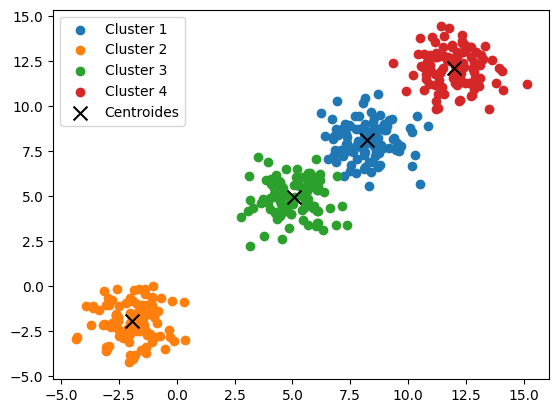

In [74]:
# Modelo
k=4
modelo_Kmeans = KMeans(n_clusters=k, random_state=42) # La respuesta a la vida, el universo y todo lo demás.
modelo_Kmeans.fit(df)

# Resultados
clusters = modelo_Kmeans.labels_
centroides = modelo_Kmeans.cluster_centers_

# Visualización
for i in range(k):
    # Filtrar puntos del cluster i
    points = df[clusters == i]
    plt.scatter(points["A"], points["B"], label=f"Cluster {i+1}")

# Dibujar los centroides
plt.scatter(centroides[:, 0], centroides[:, 1], color="black", marker="x", s=100, label="Centroides")
plt.legend()
plt.show()

**Ajuste k-means considerando 1,2,...10 clusters, guarde la distancia intra clases en un diccionario.
Estudie la documentaci ́on de la clase y modifique los argumentos init, n_init y max_iter.** (5 puntos)

In [75]:
# Clústeres a probar, esto es, desde el 1 al 10.
rango_k = range(1, 11)

# Diccionario para guardar inercia del modelo Kmeans para cada K del rango.
distancias_intraClase = {}

# Iteramos sobre los diferentes valores de k. En cada iteración se hace lo que se hizo en el ejercicio anterior.
for x in rango_k:
    modelo_Kmeans_Rango = KMeans(
        n_clusters=x, init="k-means++",  # Método de inicialización por defecto, "k-means++" porque introduce los centroides en un mejor punto para la convergencia. Nirmal Sankalana en https://medium.com/@nirmalsankalana/k-means-clustering-choosing-optimal-k-process-and-evaluation-methods-2c69377a7ee4
        n_init=5,  # Número de inicializaciones diferentes para encontrar el mejor resultado
        max_iter=100,  # Máximo número de iteraciones por inicialización.
        random_state=42) # Estado random fundamental // Adam Douglas es genial.
    
    # Ajustamos el modelo a los datos
    modelo_Kmeans_Rango.fit(df)
    
    # La inercia mide la suma de las distancias cuadradas entre los puntos y sus centroides. Se guarda en distancias_intraClase
    distancias_intraClase[x] = modelo_Kmeans_Rango.inertia_ # Se sigue el loop.

# Mostramos las distancias intra-clases calculadas para cada número de clústeres
print("Inercia por Modelo con diferentes K:")
for x, y in distancias_intraClase.items():
    print(f"{x} clústeres: {y}")


Inercia por Modelo con diferentes K:
1 clústeres: 21781.792975992223
2 clústeres: 5728.229140045009
3 clústeres: 1733.979284964782
4 clústeres: 789.0012783558575
5 clústeres: 717.0324125195723
6 clústeres: 647.9056861741216
7 clústeres: 573.0677589857859
8 clústeres: 507.93505567958425
9 clústeres: 462.365708909682
10 clústeres: 423.0617374985389


**Utilizando matplotlib (o seaborn) genere un gráfico que presente la distancia intra clases para cada k utilizado. A través del criterio del codo defina el número de clusters óptimo.** (5 puntos)

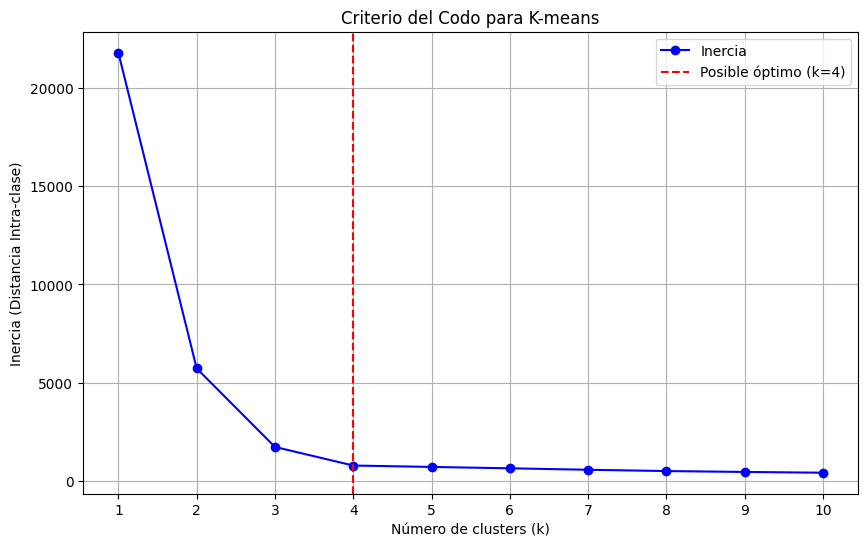

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(list(distancias_intraClase.keys()), list(distancias_intraClase.values()), "o-", color="blue", label="Inercia") # Se grafica el 
# scatterplot transformando en listas a las llaves del diccionario y valores del diccionario previo, pasándolos como la data. Puntos con linea.
plt.title("Criterio del Codo para K-means")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Distancia Intra-clase)")
plt.xticks(rango_k)
plt.axvline(x=4, color="red", linestyle="--", label="Posible óptimo (k=4)")
plt.legend()
plt.grid(True)
plt.show()

# Análisis de clústers (30 ptos)

**Aplicar el algoritmo k-means a la base de datos k-means2.csv. Aplique el procesamiento necesario a los datos para una correcta asignación de clusters.** (5 puntos)

In [77]:
from scipy.stats import zscore

In [78]:
df2 = pd.read_csv("kmeans2.csv")
display(df2.dtypes)

# Verifico que no hayan valores perdidos.
nan = df2.isna().sum()
nan

PAC_EDAD         int64
SATO2          float64
TEMPERATURA    float64
GLASGOW        float64
EVA            float64
HGT            float64
FR             float64
DIAS_HOSP      float64
dtype: object

PAC_EDAD       0
SATO2          0
TEMPERATURA    0
GLASGOW        0
EVA            0
HGT            0
FR             0
DIAS_HOSP      0
dtype: int64

In [79]:
# Como son todos float, no hay strings vacíos o strings en general que estén pasando desapercibidos como NaN,
# sin embargo, las escalas de las variables son muy diversas. Normalizo para poder aplicar kmeans sin el sesgo de la diversidad de escala.

df2_z = df2.apply(zscore)
display(df2_z.round(2))

# Aprovecho de aplicar z_score a df por si cambia el potencial número de K
df_z = df.apply(zscore)
df_z.round(2)

,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
0,1.88,-2.88,-1.44,0.1,-0.45,-0.58,-1.23,3.85
1,0.20,-0.40,-0.53,0.1,-0.99,-0.58,-0.68,6.22
2,-0.18,0.31,-1.89,0.1,-0.99,-0.58,-0.13,3.06
3,0.17,0.31,0.38,0.1,-0.99,-0.58,-0.13,-0.10
4,0.58,0.31,0.08,0.1,-0.99,-0.58,-0.13,1.87
...,...,...,...,...,...,...,...,...
129984,-0.82,0.66,-0.98,0.1,-1.54,-1.11,-1.23,-0.10
129985,-0.21,0.66,-0.98,0.1,-1.54,-1.11,-1.23,-0.10
129986,0.85,-0.05,-0.38,0.1,-1.54,-1.11,-0.13,-0.10
129987,1.00,-0.05,-0.98,0.1,-1.54,-1.11,0.42,-0.10


,A,B
0,-1.71,-1.75
1,-1.62,-1.41
2,-1.38,-1.14
3,-1.70,-1.78
4,-1.45,-1.30
...,...,...
395,1.07,1.15
396,0.85,1.13
397,1.05,1.32
398,1.03,1.14


**Determine el número de clusters adecuados con alguno de los tres métodos vistos en clases (regla del codo, Davies-Bouldin o Silhouette plot). Genere una función (o un conjunto de funciones) que le permita obtener el reporte de las métricas y visualizaciones.** (10 puntos)

In [84]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Para método del codo o inercia

def calc_inercia(df, rango_k):
    
    inercias = []
    
    for x in rango_k:
        kmeans = KMeans(n_clusters=x, init="k-means++", random_state=42)
        # Ajustamos el modelo a los datos
        kmeans.fit(df)
        # La inercia mide la suma de las distancias cuadradas entre los puntos y sus centroides. Se guarda en inercias
        inercias.append(kmeans.inertia_) # Se sigue el loop hasta revisar todos los K
    
    return inercias

def calc_silhouette(df, rango_k):

    puntajes_silhouette = []
    
    # Replico la misma estructura de arriba y también la replicaré en el cálculo de davies_bouldin
    for x in rango_k: 
        if x > 1: 
            kmeans = KMeans(n_clusters=x, init="k-means++", random_state=42) 
            etiquetas = kmeans.fit_predict(df)
            puntaje = silhouette_score(df, etiquetas)
            puntajes_silhouette.append(puntaje)

    return puntajes_silhouette

def calc_davies_bouldin(df, rango_k):

    puntajes_db = []

    for x in rango_k:
        if x > 1: 
            kmeans = KMeans(n_clusters=x, init="k-means++", random_state=42) 
            etiquetas = kmeans.fit_predict(df)
            puntaje = davies_bouldin_score(df, etiquetas)
            puntajes_db.append(puntaje)

    return puntajes_db

def graficos(rango_k, inercias=None, puntaje_silhouette=None, puntaje_db=None):

    plt.figure(figsize=(15, 10))

    # Gráfico de Inercia
    if inercias:

        plt.subplot(2,1,1) # Inercia y Silhouette pueden mostrarse juntos si son llamados a la vez con esto. Dos filas una columna.
        plt.plot(rango_k, inercias, "o-", color="blue", label="Inercia") 
        plt.title("Criterio del Codo para K-means")
        plt.xlabel("Número de clusters (k)")
        plt.ylabel("Inercia (Distancia Intra-clase)")
        plt.xticks(rango_k)
        plt.legend()
        plt.grid(True)

    # Gráfico de Silhouette
    if puntaje_silhouette:
        plt.subplot(2,1,1)
        plt.plot(rango_k, puntaje_silhouette, "o-", color="green", label="Silhouette")
        plt.title("Puntuación Silhouette para K-means")
        plt.xlabel("Número de Clústers Revisados (K)")
        plt.ylabel("Puntaje de Silhouette")
        plt.xticks(rango_k)
        plt.legend()
        plt.grid(True)

    # Davies-Bouldin
    if puntaje_db:
        plt.figure(figsize=(15, 5))
        plt.plot(rango_k,puntaje_db, "o-", color="orange", label="Davies-Bouldin")
        plt.title("Puntuación de Davies-Bouldin para K-means")
        plt.xlabel("Número de Clústers Revisados (K)")
        plt.ylabel("Puntaje de Davies-Bouldin")
        plt.xticks(rango_k)
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.show()

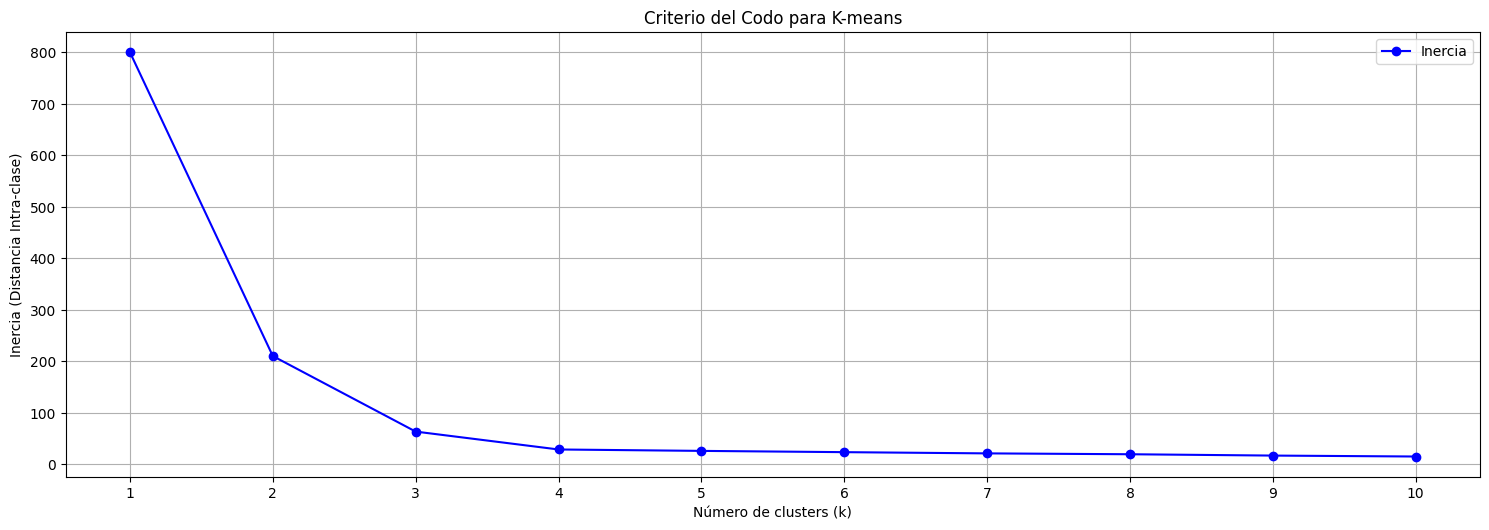

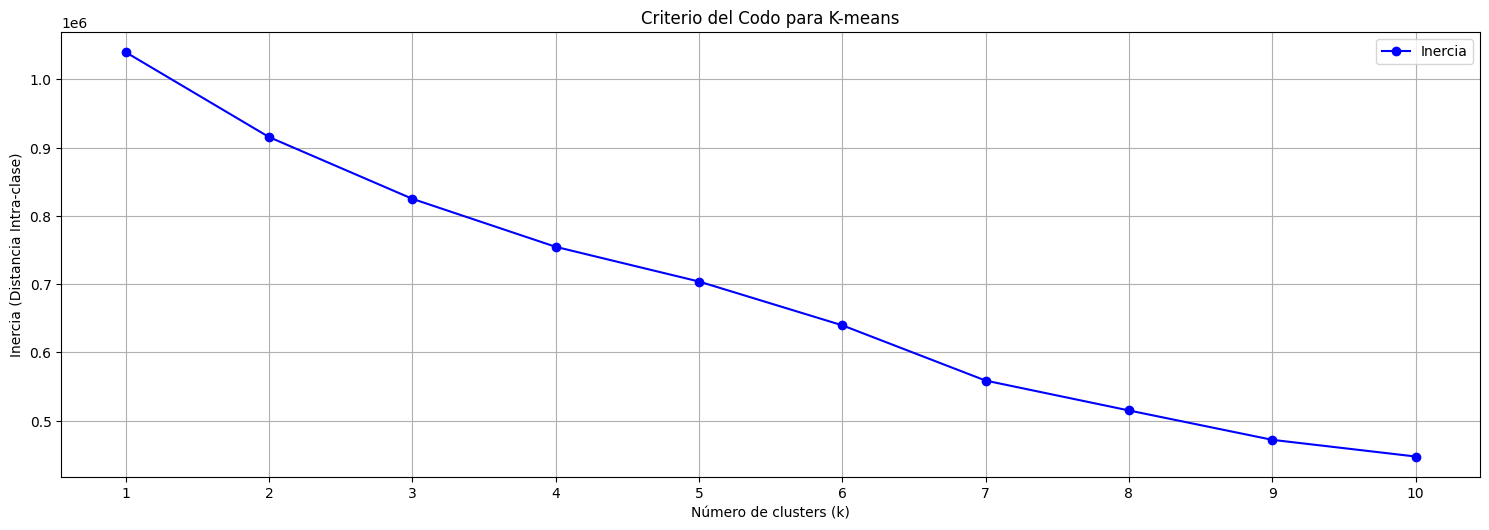

In [86]:
amplitud_k = range(1,11)

inercia_1 = calc_inercia(df=df_z,rango_k=amplitud_k)
inercia_2 = calc_inercia(df=df2_z,rango_k=amplitud_k)

# silhouette_1 = calc_silhouette(df=df2_z,rango_k=amplitud_k)
# davies_bouldin_1 = calc_davies_bouldin(df=df2_z,rango_k=amplitud_k)
# graficos(rango_k=amplitud_k,inercias=inercia_1,puntaje_silhouette=silhouette_1,puntaje_db=davies_bouldin_1)
# graficos(rango_k=amplitud_k,puntaje_silhouette=silhouette_1)

graficos(rango_k=amplitud_k,inercias=inercia_1)
graficos(rango_k=amplitud_k,inercias=inercia_2)

Estimado profesor, Colapsé. Mi hijo no se duerme, está resfriado y llora. Por otro lado, no avanzo mucho porque no he podido ver si mis funciones para calcular Silhouette y Davies-Bouldin funcionan, porque la celda no para de procesar, mi PC prende todos los ventiladores y quiere suicidarse. //risa.

Envío el archivo tal y como está con el estado de avance que tiene.

Un abrazo,

**Ignacio Carrere.-**